# Kütüphaneler

In [22]:
import pandas as pd  # Veri setinin düzenlenmesi
import numpy as np   # Matematiksel işlemler
import tensorflow as tf    # Sinir ağının kurulması ve eğitilmesi
import keras

import matplotlib.pyplot as plt    # Grafik çizimi
import seaborn as sns

from keras.datasets import cifar10   # Veri setini elde etmek için
from keras.utils import to_categorical    # Çıktıların kategorize edilmesi
from keras.models import Sequential
from keras import layers
from keras import optimizers

import warnings
warnings.filterwarnings("ignore")

## Veri Ön İşleme

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [24]:
number_of_classes = 10
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [25]:
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_test : {}".format(y_test.shape))

X_train : (50000, 32, 32, 3)
y_train : (50000, 10)
X_test : (10000, 32, 32, 3)
y_test : (10000, 10)


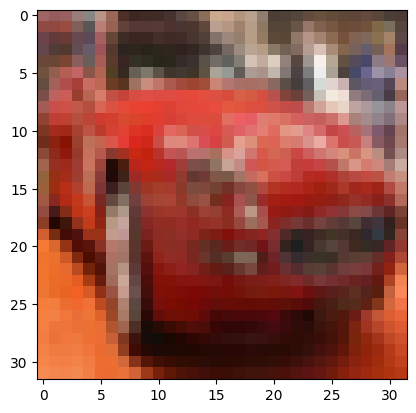

In [26]:
plt.imshow(X_train[5])

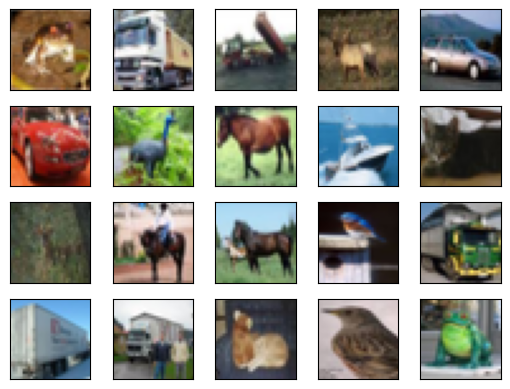

In [27]:
figs, axes = plt.subplots(4,5)

for i in range(4):
    for j in range(5):
        axes[i, j].imshow(X_train[i*5+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].grid(False)

### Normalizasyon

In [28]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

### Model Oluşturma

In [29]:
# Model Parametreleri
par_batch_size = 32
par_epochs = 30

In [30]:
def cnn_model():
    model = Sequential()

    model.add(layers.Conv2D(filters=32,
                            kernel_size=(3,3),
                            activation='relu',
                            padding='same',
                            input_shape= (32, 32, 3)))

    model.add(layers.Conv2D(filters=32,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters=64,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(filters=64,
                            kernel_size=(3,3),
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPool2D())

    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(512,activation='relu'))

    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10,activation='softmax'))

    model.summary()

    return model

In [31]:
model = cnn_model()

# RMSprop Optimizer
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate=0.0001), metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [32]:
#Belirlenen parametreler ve eğitim veri seti ile kurulan modelin eğitilmesi

hist = model.fit(X_train, y_train, batch_size=par_batch_size, epochs=par_epochs, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 238s 152ms/step - loss: 1.9254 - acc: 0.2884 - val_loss: 1.6790 - val_acc: 0.3980
Epoch 2/30
1563/1563 [==============================] - 232s 148ms/step - loss: 1.6049 - acc: 0.4109 - val_loss: 1.4900 - val_acc: 0.4521
Epoch 3/30
1563/1563 [==============================] - 234s 150ms/step - loss: 1.4812 - acc: 0.4566 - val_loss: 1.3842 - val_acc: 0.5024
Epoch 4/30
1563/1563 [==============================] - 240s 154ms/step - loss: 1.3906 - acc: 0.4943 - val_loss: 1.3135 - val_acc: 0.5321
Epoch 5/30
1563/1563 [==============================] - 232s 149ms/step - loss: 1.3265 - acc: 0.5203 - val_loss: 1.2569 - val_acc: 0.5484
Epoch 6/30
1563/1563 [==============================] - 230s 147ms/step - loss: 1.2717 - acc: 0.5424 - val_loss: 1.1839 - val_acc: 0.5855
Epoch 7/30
1563/1563 [==============================] - 239s 153ms/step - loss: 1.2121 - acc: 0.5646 - val_loss: 1.1290 - val_acc: 0.6030
Epoch 8/30
1563/1563 [============

In [33]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 37ms/step - loss: 0.6905 - acc: 0.7594
Test loss: 0.6905084252357483
Test accuracy: 0.7594000101089478


In [34]:
def result_graph():
  acc = hist.history['acc']
  val_acc = hist.history['val_acc']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1,len(acc)+1)

  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.show()

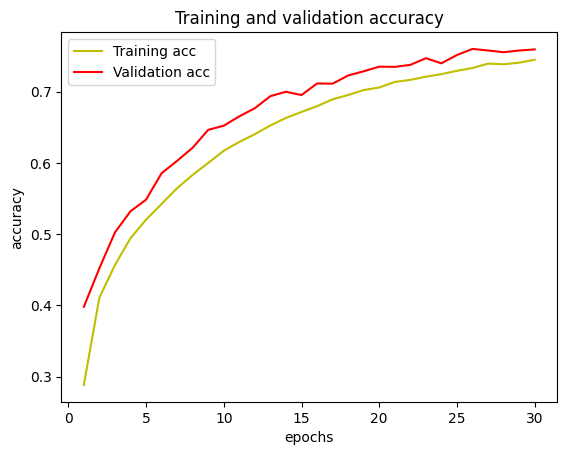

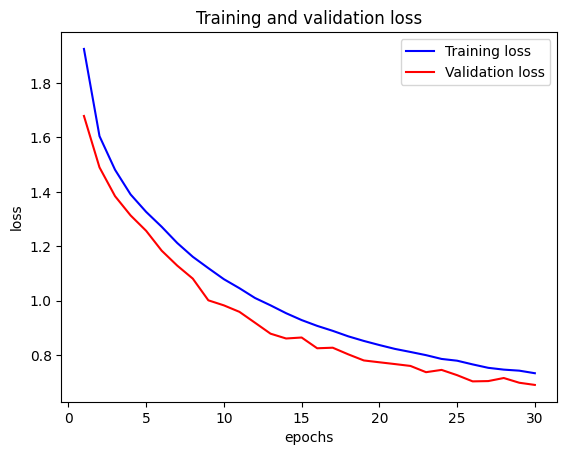

In [35]:
result_graph()

In [36]:
# Adam Optimizer
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [37]:
hist = model.fit(X_train, y_train, batch_size=par_batch_size, epochs=par_epochs, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 251s 160ms/step - loss: 0.7210 - acc: 0.7479 - val_loss: 0.6706 - val_acc: 0.7676
Epoch 2/30
1563/1563 [==============================] - 254s 162ms/step - loss: 0.7082 - acc: 0.7545 - val_loss: 0.6720 - val_acc: 0.7676
Epoch 3/30
1563/1563 [==============================] - 249s 160ms/step - loss: 0.6913 - acc: 0.7598 - val_loss: 0.6550 - val_acc: 0.7750
Epoch 4/30
1563/1563 [==============================] - 234s 150ms/step - loss: 0.6813 - acc: 0.7613 - val_loss: 0.6519 - val_acc: 0.7750
Epoch 5/30
1563/1563 [==============================] - 233s 149ms/step - loss: 0.6752 - acc: 0.7640 - val_loss: 0.6333 - val_acc: 0.7823
Epoch 6/30
1563/1563 [==============================] - 241s 154ms/step - loss: 0.6648 - acc: 0.7679 - val_loss: 0.6416 - val_acc: 0.7760
Epoch 7/30
1563/1563 [==============================] - 231s 148ms/step - loss: 0.6519 - acc: 0.7710 - val_loss: 0.6389 - val_acc: 0.7797
Epoch 8/30
1563/1563 [============

In [38]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 38ms/step - loss: 0.5437 - acc: 0.8148
Test loss: 0.5436893701553345
Test accuracy: 0.8148000240325928


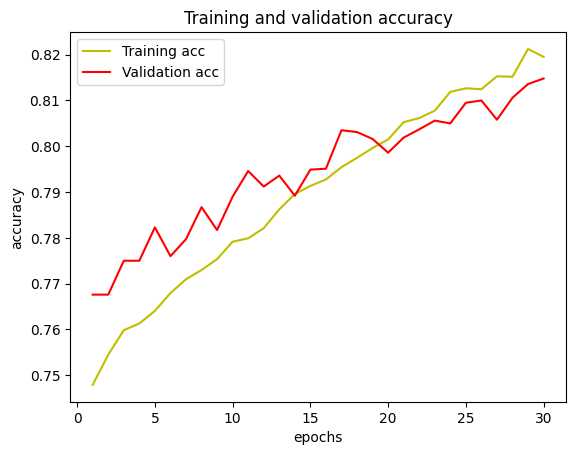

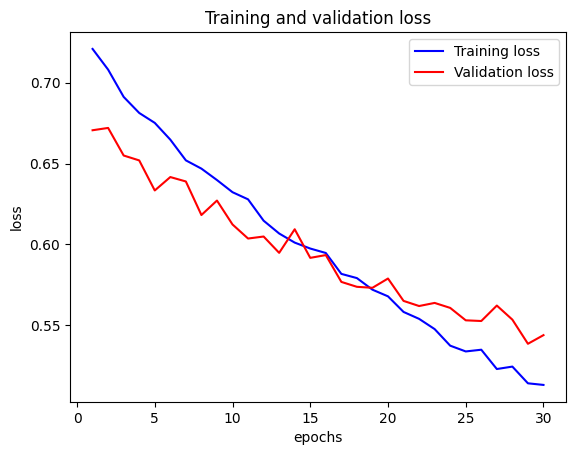

In [39]:
result_graph()